In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df= pd.read_csv("spotify_songs_dataset.csv")

In [3]:
df

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NaN
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,SP49996,Event push do body.,Shelley Robinson,Wrong cup.,Pop,1999-05-26,272.0,38,25078113,Spanish,No,Indie,Melissa Wilson,Leslie Ferguson,Daniel Cruz
49996,SP49997,Share clearly role.,Jennifer Kennedy,That actually.,Folk,2016-08-21,355.0,62,29908581,Korean,Yes,Atlantic Records,Timothy Rice,Randall Martinez,NaN
49997,SP49998,Wonder type simply.,Hailey Walsh,South Democrat.,Pop,1997-02-28,207.0,38,75864558,Spanish,No,Atlantic Records,Susan Diaz,Katrina Fleming,NaN
49998,SP49999,Company.,Leah Coleman,Front.,Electronic,1996-07-15,266.0,10,41817978,English,No,Sony Music,Dr. Zachary Bell,Pam Schultz,NaN


In [4]:
print("Shape of the dataset:",df.shape)

Shape of the dataset: (50000, 15)


In [5]:
df.isnull().sum()

song_id                 0
song_title              0
artist                  0
album                   0
genre                   0
release_date            0
duration             5000
popularity              0
stream                  0
language             2500
explicit_content        0
label                   0
composer                0
producer                0
collaboration       35000
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           50000 non-null  object 
 1   song_title        50000 non-null  object 
 2   artist            50000 non-null  object 
 3   album             50000 non-null  object 
 4   genre             50000 non-null  object 
 5   release_date      50000 non-null  object 
 6   duration          45000 non-null  float64
 7   popularity        50000 non-null  int64  
 8   stream            50000 non-null  int64  
 9   language          47500 non-null  object 
 10  explicit_content  50000 non-null  object 
 11  label             50000 non-null  object 
 12  composer          50000 non-null  object 
 13  producer          50000 non-null  object 
 14  collaboration     15000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 5.7+ MB


In [7]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df['duration'] = (
    df['duration']
    .astype(str)                         
    .str.replace(',', '', regex=False)   
    .pipe(pd.to_numeric, errors='coerce') 
)


In [8]:
df['duration'].fillna(df['duration'].mean(), inplace=True)

C:\Users\shrad\AppData\Local\Temp\ipykernel_16488\3001203772.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna(df['duration'].mean(), inplace=True)


In [9]:
df['language'].fillna(df['language'].mode()[0], inplace=True)

C:\Users\shrad\AppData\Local\Temp\ipykernel_16488\3749911940.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['language'].fillna(df['language'].mode()[0], inplace=True)


In [10]:
df.drop(columns=['collaboration'], inplace=True)

In [11]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [12]:
df['year'] = df['release_date'].dt.year

In [13]:
df['duration'] = df['duration'].astype(int)

In [14]:
df.dtypes

song_id                     object
song_title                  object
artist                      object
album                       object
genre                       object
release_date        datetime64[ns]
duration                     int32
popularity                   int64
stream                       int64
language                    object
explicit_content            object
label                       object
composer                    object
producer                    object
year                         int32
dtype: object

In [15]:
def categorize_popularity(score):
    if score >= 80:
        return "Very Popular"
    elif score >= 50:
        return "Popular"
    else:
        return "Less Popular"

df['popularity_category'] = df['popularity'].apply(categorize_popularity)

In [16]:
df['duration'].min()

33

In [17]:
def categorize_duration(seconds):
    if seconds < 120:
        return "Short"
    elif 120 <= seconds < 300:
        return "Medium"
    else:
        return "Long"

df['duration_category'] = df['duration'].apply(categorize_duration)


# Histogram of Song Durations

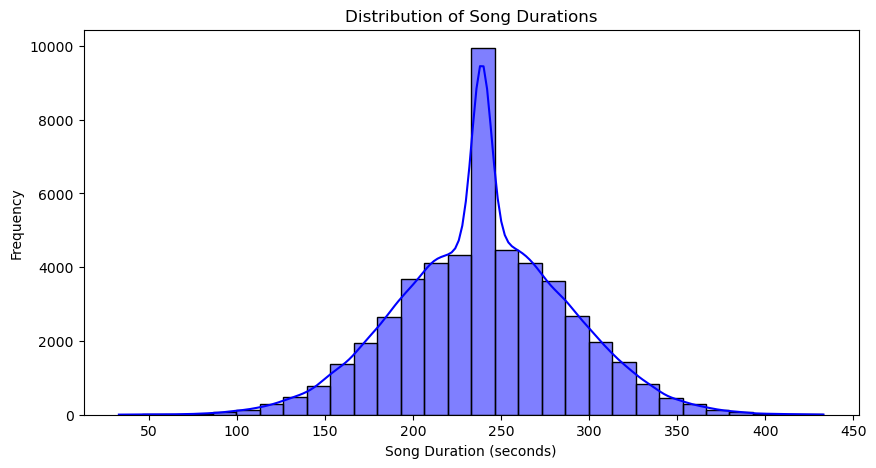

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df['duration'], bins=30, kde=True, color="blue")
plt.xlabel("Song Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Song Durations")
plt.show()

# Countplot for Duration Categories

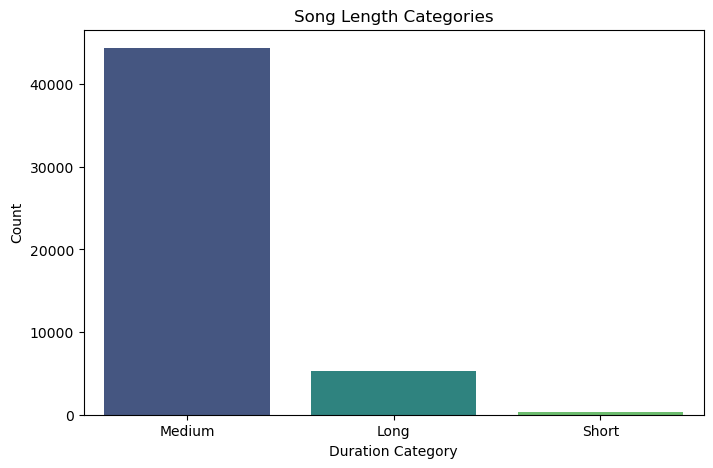

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['duration_category'],hue=df['duration_category'], palette="viridis")
plt.xlabel("Duration Category")
plt.ylabel("Count")
plt.title("Song Length Categories")
plt.show()


# Box Plot of Popularity by Genre

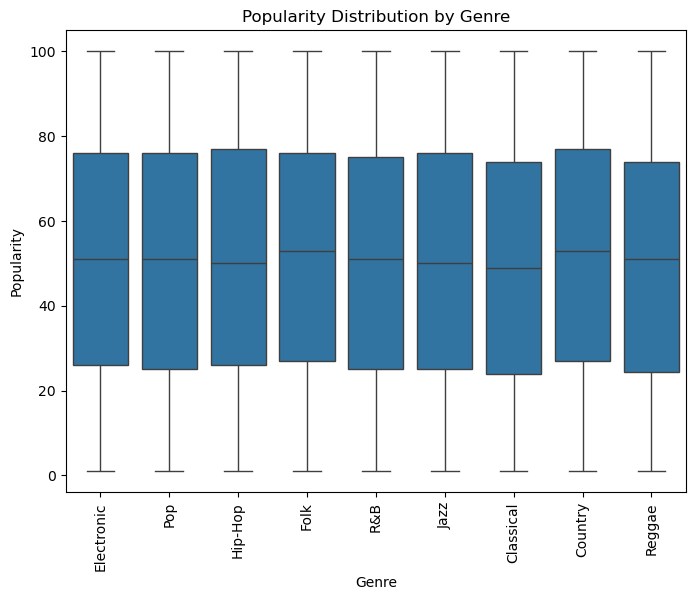

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="genre", y="popularity", data=df)
plt.xticks(rotation=90)  
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.title("Popularity Distribution by Genre")
plt.show()


In [22]:
df.to_csv('cleaned_spotify_songs.csv', index=False)

In [23]:
pip install sqlalchemy pymysql

Note: you may need to restart the kernel to use updated packages.


In [25]:
from sqlalchemy import create_engine
import pandas as pd

# Replace with your MySQL credentials
username = 'root'
password = '9380839400%40Ks'
host = 'localhost:3306'
database = 'Project'

# Create the connection URL
connection_url = f'mysql+pymysql://{username}:{password}@{host}/{database}'

try:
    # Create an SQLAlchemy engine
    engine = create_engine(connection_url)
    print("Connected to the database successfully.")

    # Create a DataFrame to upload
    accounts_df = pd.read_csv('cleaned_spotify_songs.csv')
    print("CSV file loaded successfully.")

    # Upload the DataFrame to MySQL
    accounts_df.to_sql('Spotify_songs', con=engine, if_exists='replace', index=False)
    print("Data uploaded successfully.")

except Exception as e:
    print("An error occurred:", e)

Connected to the database successfully.
CSV file loaded successfully.
Data uploaded successfully.


C:\Users\shrad\AppData\Local\Temp\ipykernel_16488\1954379355.py:23: UserWarning: The provided table name 'Spotify_songs' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  accounts_df.to_sql('Spotify_songs', con=engine, if_exists='replace', index=False)


In [27]:
df.head(2)

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,year,popularity_category,duration_category
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,1997,Less Popular,Medium
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,2015,Popular,Medium


In [28]:
song_details = df[['song_id', 'song_title', 'artist', 'album', 'release_date']]


In [30]:
song_details.to_sql("song_details", engine, if_exists="replace", index=False)

50000

In [31]:
artist_info = df[['artist', 'genre']]
track_metrics = df[['song_id', 'duration', 'popularity', 'language', 'label', 'composer']]

In [32]:
artist_info.to_sql("artist_info", engine, if_exists="replace", index=False)
track_metrics.to_sql("track_metrics", engine, if_exists="replace", index=False)

50000